In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

In [3]:
initial_data = pd.read_excel('data/initial_data.xlsx')

In [ ]:
initial_info = pd.read_excel('data/initial_data.xlsx', sheet_name='info')

In [70]:
initial_data

,Unnamed: 0,ADDRESS,CITY,REGION,Postamat_daily,cashbox_daily,Postamat_trend,cashbox_MAX,cashbox_trend,hh_500,value1,value2,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
0,0,"г.Калуга, Литейная ул., 25/15",КАЛУГА,Калужская область,NaN,3.3,NaN,13.0,1.0,7696.0,10099,3382,324698,0,0,NaN,остановка,423321
1,1,"г.Калуга, Гагарина ул., 1",КАЛУГА,Калужская область,NaN,NaN,NaN,NaN,NaN,6369.0,10068,3236,324698,1,1,NaN,остановка,423321
2,2,"г.Калуга, Кибальчича ул., 25",КАЛУГА,Калужская область,NaN,3.1,NaN,12.0,1.0,5553.0,10100,3436,324698,1,0,NaN,NaN,423321
3,3,"г.Калуга, Пестеля ул., 60/49",КАЛУГА,Калужская область,3.0,2.2,0.0,12.0,1.0,7162.0,10099,3257,324698,0,0,NaN,NaN,423321
4,4,"г.Калуга, Ленина ул., 81",КАЛУГА,Калужская область,1.0,2.0,0.0,9.0,1.0,6269.0,10096,3195,324698,1,0,NaN,остановка,423321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,412,д.Чернятино86А,Чернятино,Тульская область,NaN,NaN,NaN,NaN,NaN,348.0,9939,2557,1234,0,0,NaN,NaN,387679
413,413,"п.Дубовка, квартал 5/15, Центральный перс.6",ДУБОВКА ПОСЁЛОК,Тульская область,NaN,NaN,NaN,NaN,NaN,355.0,9930,2550,8942,0,0,NaN,остановка,387679
414,414,"г.Донской, мкр.Северо-Задонск, Мичурина ул, 76...",Северо-Задонск,Тульская область,NaN,NaN,NaN,NaN,NaN,283.0,9930,2533,500,0,0,NaN,NaN,387679
415,415,"с.Гремячее, Новики ул., 12",Гремячее,Тульская область,NaN,NaN,NaN,NaN,NaN,139.0,9944,2421,1337,0,0,NaN,NaN,387679


In [71]:
initial_info

,Field,Type,Comment
0,ADDRESS,Справочная информация,NaN
1,CITY,Справочная информация,NaN
2,REGION,Справочная информация,NaN
3,Postamat_daily,Целевая переменная,Постамат: выдача в день посылок в среднем за п...
4,cashbox_daily,Целевая переменная,Касса: выдача в день посылок в среднем за пери...
5,Postamat_trend,Внутренний признак,Постамат: выдано посылок в последнем месяце по...
6,cashbox_MAX,Внутренний признак,Касса: максимальное число выданных посылок в д...
7,cashbox_trend,Внутренний признак,Касса: выдано посылок в последнем месяце по от...
8,hh_500,Признак,Количество домохозяйств в радиусе 500 м от точки
9,value1,Признак,Показатель продаж магазина 1


In [72]:
initial_data['NEAR_metro_rjd'].fillna(0, inplace=True)

In [73]:
renamer = {np.nan:0, 'автостанция':1, 'остановка':2}
initial_data['NEAR_Stations'] = initial_data['NEAR_Stations'].map(renamer)

In [74]:
initial_data.describe()

,Unnamed: 0,Postamat_daily,cashbox_daily,Postamat_trend,cashbox_MAX,cashbox_trend,hh_500,value1,value2,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
count,417.000000,72.000000,153.000000,72.000000,153.000000,140.000000,416.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,208.002398,2.416667,1.362745,0.347222,7.156863,0.892857,2551.600962,10006.038369,2808.601918,147402.803357,0.103118,0.035971,0.023981,0.436451,404089.705036
std,120.525941,1.275445,0.899699,0.479428,3.509606,0.310405,1963.959893,57.084102,202.017409,175342.903452,0.304478,0.186442,0.153173,0.824163,17786.448797
min,0.000000,1.000000,0.200000,0.000000,1.000000,0.000000,0.000000,9911.000000,2231.000000,119.000000,0.000000,0.000000,0.000000,0.000000,387679.000000
25%,104.000000,2.000000,0.700000,0.000000,5.000000,1.000000,1001.500000,9956.000000,2670.000000,11288.000000,0.000000,0.000000,0.000000,0.000000,387679.000000
50%,208.000000,2.000000,1.200000,0.000000,7.000000,1.000000,2165.000000,9999.000000,2781.000000,55282.000000,0.000000,0.000000,0.000000,0.000000,387679.000000
75%,312.000000,3.000000,1.900000,1.000000,9.000000,1.000000,3558.750000,10056.000000,2928.000000,324698.000000,0.000000,0.000000,0.000000,0.000000,423321.000000
max,417.000000,7.000000,4.800000,1.000000,19.000000,1.000000,9775.000000,10100.000000,3484.000000,482873.000000,1.000000,1.000000,1.000000,2.000000,423321.000000


In [89]:
initial_data['CITY'] = [w.lower() for w in initial_data['CITY']]

In [90]:
initial_data.head()

,Unnamed: 0,ADDRESS,CITY,REGION,Postamat_daily,cashbox_daily,Postamat_trend,cashbox_MAX,cashbox_trend,hh_500,value1,value2,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
0,0,"г.Калуга, Литейная ул., 25/15",калуга,Калужская область,NaN,3.3,NaN,13.0,1.0,7696.0,10099,3382,324698,0,0,0.0,2,423321
1,1,"г.Калуга, Гагарина ул., 1",калуга,Калужская область,NaN,NaN,NaN,NaN,NaN,6369.0,10068,3236,324698,1,1,0.0,2,423321
2,2,"г.Калуга, Кибальчича ул., 25",калуга,Калужская область,NaN,3.1,NaN,12.0,1.0,5553.0,10100,3436,324698,1,0,0.0,0,423321
3,3,"г.Калуга, Пестеля ул., 60/49",калуга,Калужская область,3.0,2.2,0.0,12.0,1.0,7162.0,10099,3257,324698,0,0,0.0,0,423321
4,4,"г.Калуга, Ленина ул., 81",калуга,Калужская область,1.0,2.0,0.0,9.0,1.0,6269.0,10096,3195,324698,1,0,0.0,2,423321


In [28]:
set(initial_data['Postamat_daily'].dropna())

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}

In [32]:
set(initial_data['cashbox_daily'].dropna())

{0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.7999999999999999,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 3.1,
 3.2,
 3.3,
 3.5,
 3.8,
 4.1,
 4.399999999999999,
 4.8}

In [108]:
city_lens = sorted(dict(Counter(initial_data['CITY'])).values())

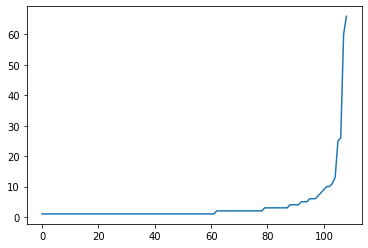

In [110]:
plt.plot(city_lens)